In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import matplotlib.cm as cm

from instances.parser import *

from math import atan, cos, sin, pi

from E3PNT.e3pnt import *
from E3PNT.poly_function import *
from E2PNT.TwoPointEllipse import *

import time
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
#mp.rcParams['text.usetex'] = True
#mp.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

<IPython.core.display.Javascript object>


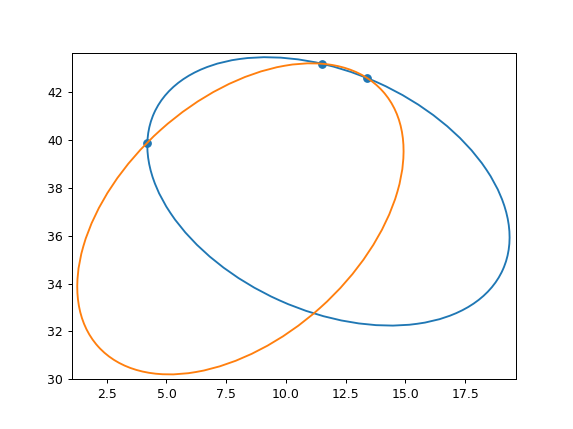

<IPython.core.display.Javascript object>


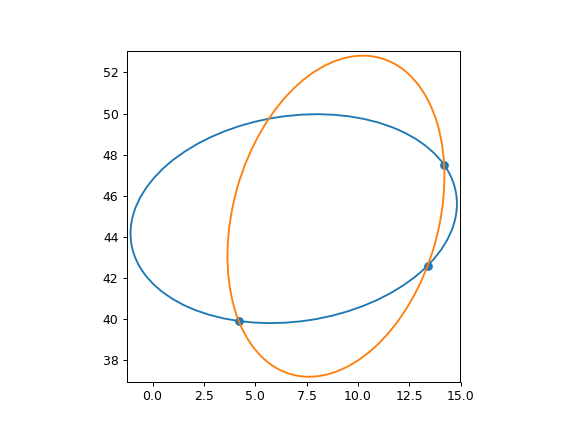

<IPython.core.display.Javascript object>


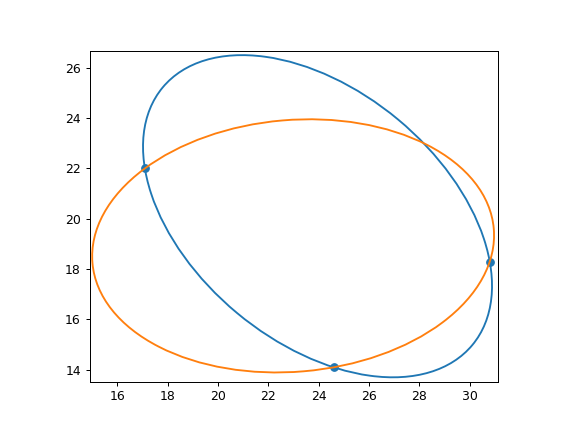

0.0021698474884033203 0.0009861503328595842


In [3]:
I = parse_input('../instances/danft1.txt')
X=I.X
Y=I.Y
n = len(X)
m = len(I.a)

markers = ['o', 's', '^', 'h']
ccnt = 0
#print(colors)

running_time = []

for h in range(1):
    a = I.a[1]
    b = I.b[1]


    for i in range(n):
        for j in range(i+1, n):
            for k in range(j+1, n):

                xs = [X[i], X[j], X[k]]
                ys = [Y[i], Y[j], Y[k]]

                t1 = time.time()
                sols = e3pnt(a, b, xs, ys)
                running_time.append(time.time() - t1)
                
                if len(sols) == 0:
                    continue
                fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
                ax.scatter(xs, ys)
                
                csl = 0
                for sol in sols:
                    xc, yc, theta = sol
                    #print(f"{xc}, {yc}, {theta} ->>>> {xs} ------->>>> {ys}")
                    E=mp.patches.Ellipse([xc, yc], a * 2, b * 2, fill=False, angle=theta/pi * 180, color=colors[csl], lw=1.5, alpha=1)
                    ax.add_patch(E)
                    ax.autoscale(tight=True)
                    csl += 1

                

print(max(running_time), np.mean(running_time))

In [6]:
%%time

I = parse_input('../instances/danft1.txt')
X=I.X
Y=I.Y
n = len(X)
m = len(I.a)

markers = ['o', 's', '^', 'h']
ccnt = 0
#print(colors)

running_time = []
error = []

for h in range(1):
    a = I.a[h]
    b = I.b[h]


    for i in range(n):
        for j in range(i+1, n):
            for k in range(j+1, n):

                xs = [X[i], X[j], X[k]]
                ys = [Y[i], Y[j], Y[k]]

                coeff = exp_poly_coeff_t(a, b, xs[1]-xs[0], xs[2]-xs[0], ys[1]-ys[0], ys[2]-ys[0])
                
                #print(coeff)
                t1 = time.time()
                sols = e3pnt(a, b, xs, ys)
                
                if len(sols) > 0:
                    
                    for sol in sols:
                        xc, yc, theta = sol
                        for jj in range(3):
                            error.append(abs(1 - eval_ellipse(theta, a, b, xc, yc, xs[jj], ys[jj])))

                    print(len(sols))
                    
                running_time.append(time.time() - t1)

print(max(running_time), np.mean(running_time))

print("----- Error ------")
print(max(error), np.mean(error))
        


2
0.002107858657836914 0.0008698815391177223
----- Error ------
4.440892098500626e-16 3.1456319031046104e-16
CPU times: user 126 ms, sys: 2.99 ms, total: 129 ms
Wall time: 125 ms


[-0.02576629 -0.21817797 -0.84445327]
[-0.30630745 -0.51291083 -0.28407428]


<IPython.core.display.Javascript object>


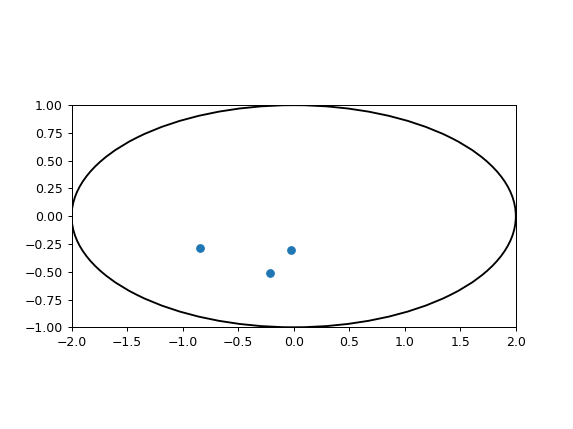

<IPython.core.display.Javascript object>


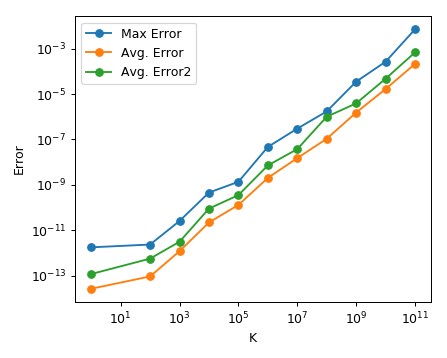

----- Sols proportion
7.09
----- Error ------
0.00701904296875 0.00021036933450137868


In [27]:

I = parse_input('../instances/danft1.txt')
X=I.X
Y=I.Y
n = len(X)
m = len(I.a)

markers = ['o', 's', '^', 'h']
ccnt = 0
#print(colors)

running_time = []

n = 100
nsols = 0

K=1000

plotted = False

error_by_K = dict()
error_by_K_avg = dict()

error_by_K_rel = dict()

for K in [1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10, 1e11]:
    error = []
    rel_error = []
    
    for cnt in range(n):

        a = 2 * K
        b = 1 * K
        xs = K*np.random.normal(0, .8, 3)
        ys = K*np.random.normal(0, .8, 3)


        coeff = exp_poly_coeff_t(a, b, xs[1]-xs[0], xs[2]-xs[0], ys[1]-ys[0], ys[2]-ys[0])

        #print(coeff)
        t1 = time.time()
        sols = e3pnt(a, b, xs, ys)

        if len(sols) > 0:
            nsols += 1
            for sol in sols:
                xc, yc, theta = sol
                #for jj in range(3):
                #    error.append(abs(1 - eval_ellipse(theta, a, b, xc, yc, xs[jj], ys[jj])))
                error.append(angle_error(theta, a, b, xs, ys))
                rel_error.append(abs(angle_error(theta, a, b, xs, ys)/theta))


        elif not plotted:
            plotted = True
            print(xs)
            print(ys)
            fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
            ax.scatter(xs, ys)

            E=mp.patches.Ellipse([0, 0], a * 2, b * 2, fill=False, lw=1.5, alpha=1)
            ax.add_patch(E)
            ax.autoscale(tight=True)

            plt.show()
            #print(len(sols))

        running_time.append(time.time() - t1)
    
    error_by_K[K] = max(error)
    error_by_K_avg[K] = np.mean(error)
    error_by_K_rel[K] = np.mean(rel_error)


fig2, ax2 = plt.subplots(figsize=(5, 4))
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('K')
ax2.set_ylabel('Error')

#print(error_by_K.keys())

ax2.plot(error_by_K.keys(), error_by_K.values(), 'o-', label='Max Error')
ax2.plot(error_by_K_avg.keys(), error_by_K_avg.values(), 'o-', label='Avg. Error')
ax2.plot(error_by_K_rel.keys(), error_by_K_rel.values(), 'o-', label='Avg. Error2')

ax2.legend()

plt.tight_layout()

fig2.savefig('e3p_error.pdf')

#print(max(running_time), np.mean(running_time))
print("----- Sols proportion")
print(nsols/n)

print("----- Error ------")
print(max(error), np.mean(error))
        

<IPython.core.display.Javascript object>


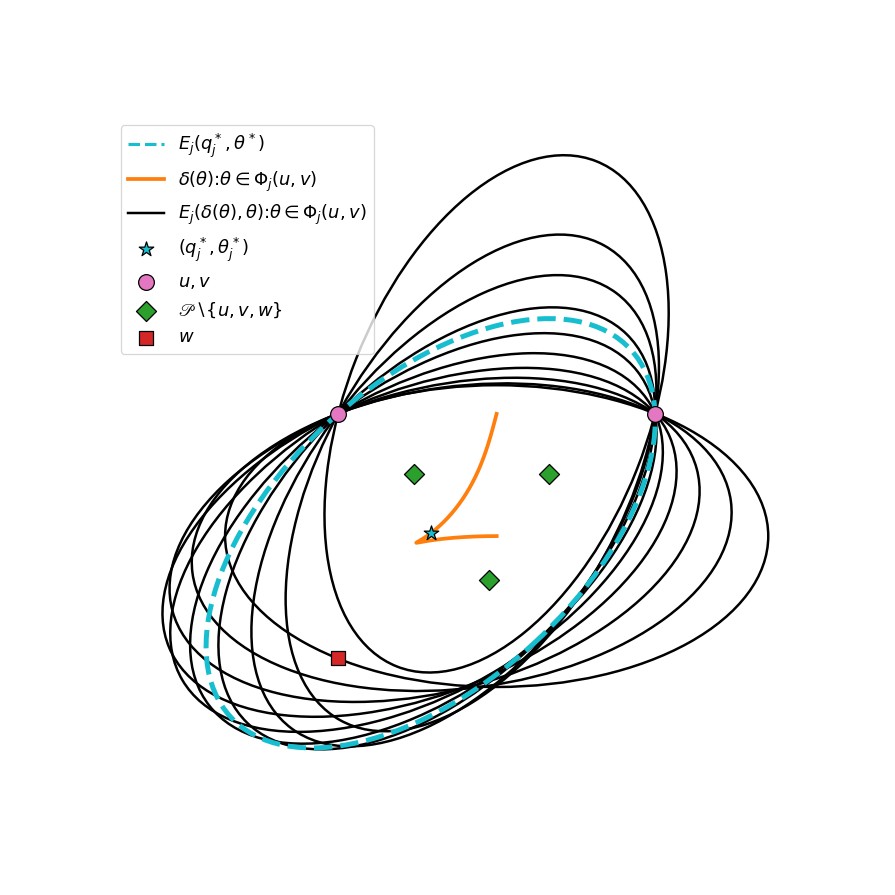

(0, 0), (2.1, 0) a 1.1953245683976224 1.5707963267948966


In [97]:
xs = np.random.random(5)
ys = np.random.random(5)
a = 1.8
b = 1
n = 5

xs = [0, 2.1]
ys = [0, 0]

n = len(xs)
#fig, ax = get_fig_ax()
#plot_points(ax, xs, ys)

#print(xs)
#print(ys)
hd = False

for i in range(n):
    for j in range(i+1, n):
        
        #if not hd:
        print(f"({xs[i]}, {ys[i]}), ({xs[j]}, {ys[j]})", "a", fint(a, b, [xs[i], xs[j]], [ys[i], ys[j]]), pi/2)
        #fig, ax = get_fig_ax()
        #plot_points(ax, xs, ys)
        #   hd = True
            
        for k in range(j+1, n):
            X = [xs[i], xs[j], xs[k]]
            Y = [xs[i], xs[j], xs[k]]
            
            sols = e3pnt(a, b, X, Y)
            
            print(len(sols))

In [96]:
def fa(ax, theta, a, b, X, Y, plot=True, kwargs={}):
    
    x1, y1 = rot(0, 0, -theta)
    x2, y2 = rot(X[1]-X[0], Y[1]-Y[0], -theta)
    
    sols = two_point_ellipse(a, b, x1, y1, x2, y2, False)
    

    
    #print("b", sols)
    if len(sols)==0:
        return False
    

    xc, yc = sols[0][0]
    xc, yc = rot(xc, yc, theta)
    
   
    if plot:
        xc, yc = sols[0][0]
        xc, yc = rot(xc, yc, theta)
        plot_ellipse(ax, theta, a, b, xc + X[0], yc + Y[0], kwargs)
        #xc, yc = sols[1][0]
        #xc, yc = rot(xc, yc, theta)
        #plot_ellipse(ax, theta, a, b, xc + X[0], yc + Y[0], color=color)
       
    #plot_ellipse(ax, 0, a, b, sols[0][0].x + X[0], sols[0][0].y+Y[0])

    #plot_points(ax, [0, X[1]-X[0]], [0, Y[1]-Y[0]])
    #plot_points(ax, [x1, x2], [y1, y2])
    
    return True


def fint(a, b, X, Y):
    
    lo = 0
    hi = pi/2
    
       
    fig, ax = get_fig_ax()

    ax.axis('off')
    ax.set_aspect('equal')
    ax.set_xlim(-1.5, 3.1)
    while abs(hi-lo)>1e-5:
        mi=(lo+hi)/2
        if fa(ax, mi, a, b, X, Y, plot=False):
            lo = mi
        else:
            hi = mi
    
    cn=10
    colors_ = list(map(str,np.linspace(0,.8, cn)))
    
    for cnt, t in enumerate(np.linspace(0, lo, cn)):
        fa(ax, t, a, b, X, Y, True, {'color':'black', 'lw':2})
    
    #opt solution
    th = lo/2+0.145
    fa(ax, th, a, b, X, Y, True, {'color':'tab:cyan', 'linestyle':'--', 'lw':4})
    
    x1, y1 = rot(0, 0, -th)
    x2, y2 = rot(X[1]-X[0], Y[1]-Y[0], -th)
    sols = two_point_ellipse(a, b, x1, y1, x2, y2, False)
    xc, yc = sols[0][0]
    xc, yc = rot(xc, yc, th)
    #ax.scatter(xc, yc, label=r'$(q_j^*, \theta_j^*)$', marker='*', color='black', s=100, zorder=1000)
    plot_points(ax, [xc], [yc], {'edgecolors':'black', 's': 150, 'marker':'*', 'color':'tab:cyan', 'label':r'$(q_j^*, \theta_j^*)$'})

    ax.plot([], [], label=r'$E_j(q_j^*, \theta^*)$', linestyle='--', color='tab:cyan', lw=2.5)
        
    xplt = []
    yplt = []
    for theta in np.linspace(0, lo, 1000):
        x1, y1 = rot(0, 0, -theta)
        x2, y2 = rot(X[1]-X[0], Y[1]-Y[0], -theta)
    
        sols = two_point_ellipse(a, b, x1, y1, x2, y2, False)
        
        xc, yc = sols[0][0]
        xc, yc = rot(xc, yc, theta)
        
        xplt.append(xc)
        yplt.append(yc)
    
    ax.plot(xplt, yplt, label=r'$\delta(\theta)\colon \theta \in \Phi_j(u,v)$', lw=3, color=colors[1])
    ax.plot([], [], label=r'$E_j(\delta(\theta), \theta)\colon \theta \in \Phi_j(u,v)$', color='black', lw=2)
    
    plot_points(ax, X, Y, {'edgecolors':'black', 's': 160, 'color':'tab:pink', 'label':r'$u,v$', 'marker':'o'})

    plot_points(ax, [.5, 1, 1.4], [-.4, -1.1, -.4], {'edgecolors':'black', 's': 130, 'marker':'D', 'color':'tab:green', 'label':r'$\mathscr{P}$' u'\u2216' r'$\{u,v,w\}$'})
    plot_points(ax, [0], [-1.62], {'edgecolors':'black', 's': 130, 'color':'tab:red', 'label':r'$w$', 'marker':'s'})

    
    ax.legend(loc='upper left', fontsize='x-large')


    fig.savefig('lema-3-points.pdf', bbox_inches="tight")
        
    return lo

In [25]:
def get_fig_ax():
    #plt.figure(figsize=(12, 9))  

    return plt.subplots(subplot_kw={'aspect': 'equal'}, figsize=(10, 10))

def plot_ellipse(ax, theta, a, b, xc=0, yc=0, kwargs={}):
    E=mp.patches.Ellipse([xc, yc], a * 2, b * 2, fill=False, angle=theta/pi * 180, alpha=1, **kwargs)
    ax.add_patch(E)
    #ax.autoscale(tight=True)

def plot_points(ax, X, Y, kwargs={}):
    ax.scatter(X, Y, zorder=100, **kwargs)